In [1]:
using JLD2
using Plots
using StatsBase
using LaTeXStrings
using Glob

In [2]:
data1 = jldopen("../data_archive/q_0p10_data/collated_results.jld2")["results"]
data2 = jldopen("../data_archive/no_unitary/collated_results.jld2")["results"]
data3 = jldopen("../data_archive/unlabeled_unitary/collated_results.jld2")["results"]
data4 = jldopen("../data_archive/data_gaps_and_some_coherent/collated_results.jld2")["results"];

In [3]:
typeof(data1)

Dict{NTuple{5, Any}, Tuple{Dict{Symbol, Vector{Float64}}, Dict{Symbol, Vector{Float64}}, Int64, Vector{Symbol}, Float64}}

In [ ]:
no_unitary_data = Dict{Tuple{Int,Int,Float64,Float64,Float64,Bool},Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}}()
for key in keys(data1)
    L, T, λ, δ, q = key
    new_key = (L, T, λ, δ, q, false)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data1[key]
        @assert obs == new_obs

        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data1[key]
    end
end

for key in keys(data2)
    L, T, λ, δ, q = key
    new_key = (L, T, λ, δ, q, false)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data2[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data2[key]
    end
end

for key in keys(data4)
    L, T, λ, δ, q, θ, pure = key
    if θ > 0.0
        continue
    end
   
    new_key = (L, T, λ, δ, q, pure)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data4[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data4[key]
    end
end

In [ ]:
unitary_data = Dict{Tuple{Int,Int,Float64,Float64,Float64,Float64,Bool},Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}}()
for key in keys(data3)
    L, T, λ, δ, q, θ, pure = key
    if θ == 0.0
        continue
    end
    if haskey(unitary_data, key)
        E1, E2, samples, obs, t = unitary_data[key]
        new_E1, new_E2, new_samples, new_obs, new_t = data3[key]
        @assert obs == new_obs

        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        unitary_data[key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        unitary_data[key] = data1[key]
    end
end

for key in keys(data4)
    L, T, λ, δ, q, θ, pure = key
    if θ == 0.0
        continue
    end
   
    if haskey(unitary_data, key)
        E1, E2, samples, obs, t = unitary_data[key]
        new_E1, new_E2, new_samples, new_obs, new_t = data4[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        unitary_data[new_key] = data4[key]
    end
end

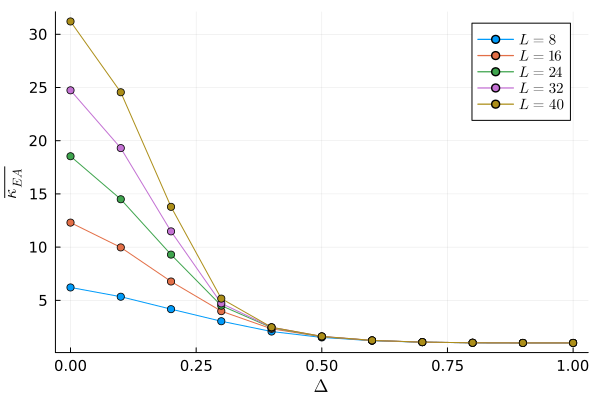

In [33]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κEA][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (0.0:0.1:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    # yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

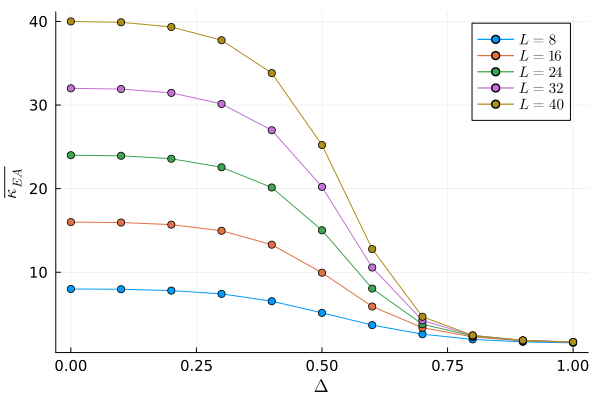

In [37]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κ2][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (0.0:0.1:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    # yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

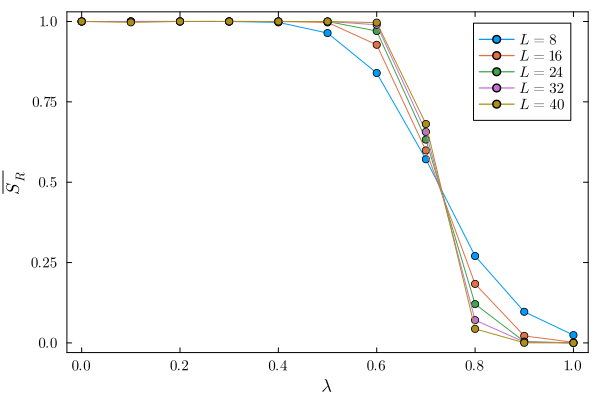

In [44]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [ ]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [ ]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [27]:
L = 8
T = 2L+2

δ = 0.7
q = 0.1

for λ in 0.0:0.1:1.0
    println("lambda=$λ, samples=$(no_unitary_data[(L, T, λ, δ, q, false)][3]))")
    if haskey(no_unitary_data, (L, T, λ, δ, q, true))
        println("lambda=$λ, samples=$(no_unitary_data[(L, T, λ, δ, q, true)][3]))")
    end
end

lambda=0.0, samples=3000)
lambda=0.1, samples=2000)
lambda=0.2, samples=2000)
lambda=0.3, samples=2000)
lambda=0.4, samples=2000)
lambda=0.5, samples=2000)
lambda=0.6, samples=2000)
lambda=0.7, samples=2000)
lambda=0.8, samples=2000)
lambda=0.9, samples=2000)
lambda=1.0, samples=3000)


In [22]:
L = 24
T = 2L+2

δ = 0.7
λ = 0.0

for q in 0.0:0.05:0.5
    println("q=$q, samples=$(no_unitary_data[(L, T, λ, δ, q, false)][3])")
    if haskey(no_unitary_data, (L, T, λ, δ, q, true))
        println("q=$q, samples=$(no_unitary_data[(L, T, λ, δ, q, true)][3]))")
    end
end

q=0.0, samples=2000
q=0.05, samples=2000
q=0.1, samples=3000
q=0.15, samples=1000
q=0.2, samples=1000
q=0.25, samples=700
q=0.3, samples=600
q=0.35, samples=500
q=0.4, samples=1000
q=0.45, samples=1000
q=0.5, samples=1000


In [88]:
data3[(24, 50, 0.2, 0.7, 0.0, 0.1, false)][1][:pure_SR][end-2]

KeyError: KeyError: key (24, 50, 0.2, 0.7, 0.0, 0.1, false) not found

In [70]:
data3[(32, 66, 0.9, 0.7, 0.0, 0.2, true)][1]

Dict{Symbol, Vector{ComplexF64}} with 2 entries:
  :pure_κEA => [32.0+0.0im, 32.0+0.0im, 23.5601-2.7926e-33im, 1.26564-1.21756e-…
  :pure_SR  => [1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 0.99902+0.0im, 0.998811+0.0im,…

In [71]:
data3[(32, 66, 0.9, 0.7, 0.0, 0.2, false)][1]

KeyError: KeyError: key (32, 66, 0.9, 0.7, 0.0, 0.2, false) not found

In [32]:
L = 8
[(key, data1[key][3]) for key in keys(data1) if key[1] == L]

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((8, 18, 0.1, 0.7, 0.1), 1000)
 ((8, 18, 1.0, 0.7, 0.1), 1000)
 ((8, 18, 0.2, 0.7, 0.1), 1000)
 ((8, 18, 0.7, 0.7, 0.1), 1000)
 ((8, 18, 0.5, 0.7, 0.1), 1000)
 ((8, 18, 0.3, 0.7, 0.1), 1000)
 ((8, 18, 0.9, 0.7, 0.1), 1000)
 ((8, 18, 0.4, 0.7, 0.1), 1000)
 ((8, 18, 0.6, 0.7, 0.1), 1000)
 ((8, 18, 0.8, 0.7, 0.1), 1000)
 ((8, 18, 0.0, 0.7, 0.1), 1000)

In [ ]:
# missing (q = 0.1, delta = 0.7):
# L = 40, lambda = 0.2, 0.3, 0.6, 40 samples
# L = 32, lambda = 0.8, 50 samples
# L = 24, lambda = 0.3, 200 samples
# L = 24, lambda = 0.9, 100 samples
# L = 16, lambda = 0.1, 100 samples

In [56]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 24 && key[5] == 0.1 && key[3] < 0.5] 

14-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((24, 50, 0.38, 0.7, 0.1), 1000)
 ((24, 50, 0.2, 0.7, 0.1), 1000)
 ((24, 50, 0.34, 0.7, 0.1), 1000)
 ((24, 50, 0.0, 0.7, 0.1), 2000)
 ((24, 50, 0.36, 0.7, 0.1), 1000)
 ((24, 50, 0.1, 0.7, 0.1), 1000)
 ((24, 50, 0.3, 0.7, 0.1), 1000)
 ((24, 50, 0.39, 0.7, 0.1), 1000)
 ((24, 50, 0.35, 0.7, 0.1), 700)
 ((24, 50, 0.31, 0.7, 0.1), 1000)
 ((24, 50, 0.32, 0.7, 0.1), 1000)
 ((24, 50, 0.4, 0.7, 0.1), 1000)
 ((24, 50, 0.37, 0.7, 0.1), 900)
 ((24, 50, 0.33, 0.7, 0.1), 900)

In [ ]:
# missing (q = 0.1, delta = 0.7):
# L = 40, lambda = 0.35, 40 samples
# L = 32, lambda = 0.39 -- 150
#                  0.35 -- 50
#                  0.31 -- 150
#                  0.33 -- 50
#                  0.38 -- 150
#                  0.34 -- 50
#                  0.36 -- 50
#                  0.71 -- 200
#                  0.74 -- 150
#                  0.78 -- 100
#                  0.72 -- 150
#                  0.73 -- 50
#                  0.75 -- 350
#                  0.76 -- 350
#                  0.77 -- 200
# L = 24, lambda = 0.35 -- 300
#                  0.37 -- 100
#                  0.33 -- 100
#                  0.74 -- 100
#                  0.78 -- 100
#

In [60]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[5] == 0.0] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 0.2, 0.7, 0.0), 1000)
 ((40, 82, 0.0, 0.7, 0.0), 960)
 ((40, 82, 0.1, 0.7, 0.0), 1000)
 ((40, 82, 1.0, 0.7, 0.0), 1000)
 ((40, 82, 0.3, 0.7, 0.0), 1000)
 ((40, 82, 0.8, 0.7, 0.0), 1000)
 ((40, 82, 0.7, 0.7, 0.0), 1000)
 ((40, 82, 0.5, 0.7, 0.0), 280)
 ((40, 82, 0.4, 0.7, 0.0), 1000)
 ((40, 82, 0.6, 0.7, 0.0), 1000)
 ((40, 82, 0.9, 0.7, 0.0), 1000)

In [ ]:
# missing (can run these PURE!) (q = 0.0, delta = 0.7)
# L = 40 lambda 0.0 -- 40
#               0.5 -- 1000 (just rerun... and maybe keep separate lol)

In [53]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[5] == 0.05] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 0.7, 0.7, 0.05), 840)
 ((40, 82, 0.5, 0.7, 0.05), 720)
 ((40, 82, 0.4, 0.7, 0.05), 1000)
 ((40, 82, 0.6, 0.7, 0.05), 40)
 ((40, 82, 0.9, 0.7, 0.05), 1000)
 ((40, 82, 0.2, 0.7, 0.05), 1000)
 ((40, 82, 0.0, 0.7, 0.05), 1000)
 ((40, 82, 0.1, 0.7, 0.05), 1000)
 ((40, 82, 1.0, 0.7, 0.05), 1000)
 ((40, 82, 0.3, 0.7, 0.05), 1000)
 ((40, 82, 0.8, 0.7, 0.05), 1000)

In [65]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 24 && key[3] == 0.0] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((24, 50, 0.0, 0.7, 0.05), 2000)
 ((24, 50, 0.0, 0.7, 0.35), 500)
 ((24, 50, 0.0, 0.7, 0.2), 1000)
 ((24, 50, 0.0, 0.7, 0.1), 2000)
 ((24, 50, 0.0, 0.7, 0.15), 1000)
 ((24, 50, 0.0, 0.7, 0.4), 1000)
 ((24, 50, 0.0, 0.7, 0.0), 2000)
 ((24, 50, 0.0, 0.7, 0.45), 1000)
 ((24, 50, 0.0, 0.7, 0.3), 600)
 ((24, 50, 0.0, 0.7, 0.5), 1000)
 ((24, 50, 0.0, 0.7, 0.25), 700)

In [55]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[3] == 1.0] 

3-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 1.0, 0.7, 0.1), 1000)
 ((40, 82, 1.0, 0.7, 0.0), 1000)
 ((40, 82, 1.0, 0.7, 0.05), 1000)